In [2]:
from astropy.table import Table
previous_filename = "m13_01.hdf5"
stars = Table.read(previous_filename, path="gaia")

len(stars)


122661

| parameter           | value       |
|---------------------|-------------|
| MIST version        | 1.2         |
| rotation v/v_crit   | 0.4         |
| log(age)            | 10.06       |
| metalicity (Fe/H)   | -1.55       |
| photometry          | PanSTARRS   |
| extinction Av       | 0           |

Reading in: ./MIST_iso_689d45a79137f.iso.cmd


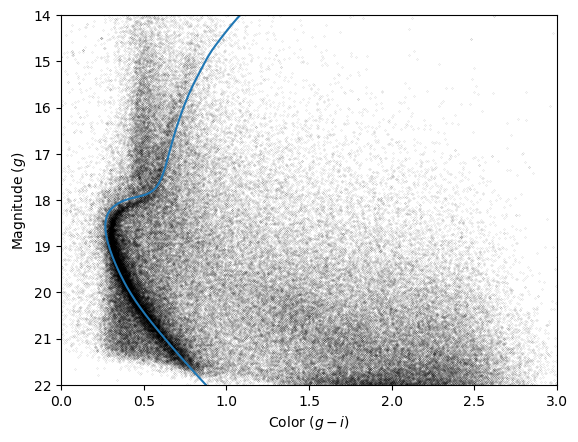

In [3]:
# apply distance modulus to isochrone to scale magnitudes to GD-1

import astropy.units as u
import matplotlib.pyplot as plt
from common import m13_info, plot_cmd, load_isochrone, adjust_isochrone

iso_filename = './MIST_iso_689d45a79137f.iso.cmd'
isochrone = load_isochrone(iso_filename)
isochrone = adjust_isochrone(isochrone, 1000*u.pc*u.mas/m13_info()['parallax'], m13_info()['reddening'], 0)
len(isochrone)

plot_cmd(stars)
plt.plot(isochrone['color_gi'], isochrone['mag_g'])


26217

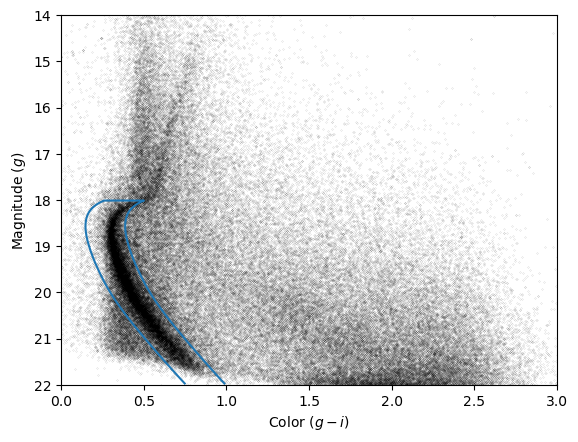

In [4]:
from common import create_isochrone_polygon, filter_to_isochrone_polygon


polygon = create_isochrone_polygon(isochrone, (18.0, 22.0), (-0.12, 0.12))
plot_cmd(stars)
plt.plot(polygon['color_gi'], polygon['mag_g'])

iso_stars = filter_to_isochrone_polygon(stars, polygon)
len(iso_stars)

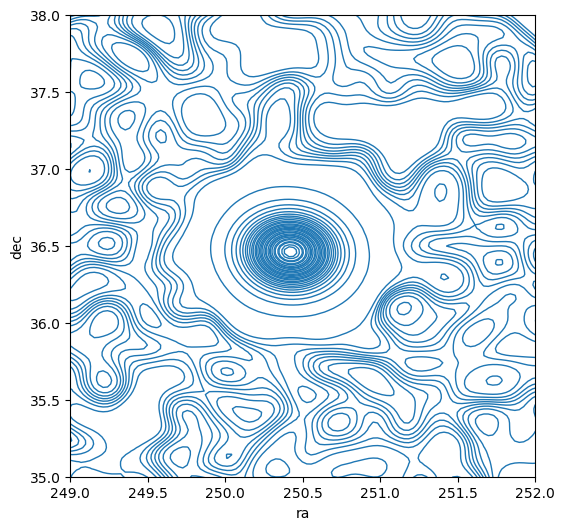

In [5]:
from common import plot_number_density

plot_number_density(iso_stars)

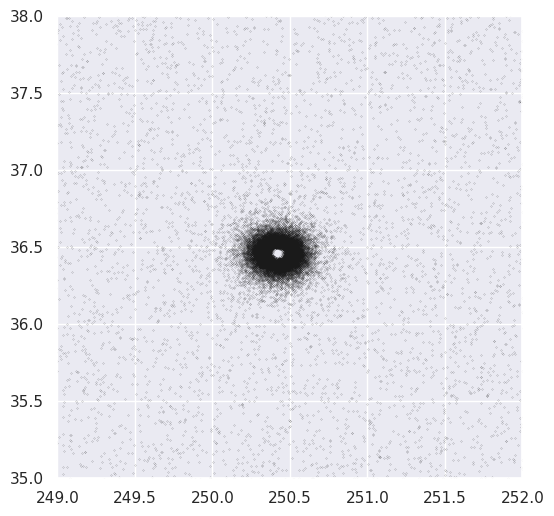

In [6]:
from common import plot_scatter
import seaborn as sns

sns.set_theme()

plot_scatter(iso_stars)

#plt.circle()

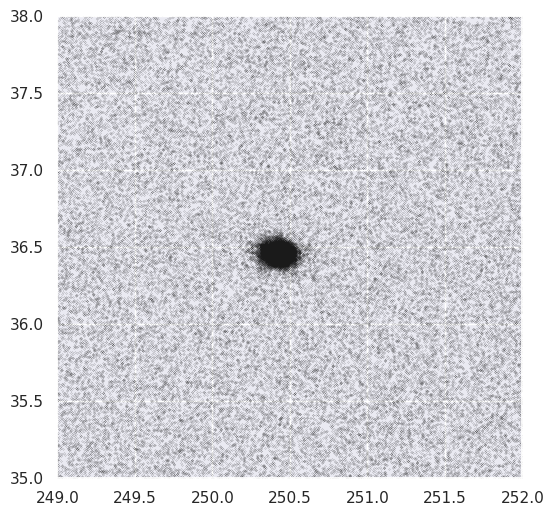

In [7]:
# what is the little eye?
from astropy.table import setdiff

non_iso_stars = setdiff(stars, iso_stars, keys=['source_id'])
plot_scatter(non_iso_stars)

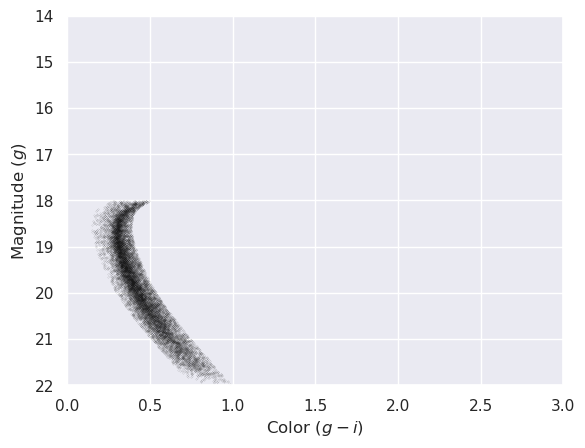

In [8]:
from astropy.coordinates import SkyCoord

center_coords = SkyCoord(ra=m13_info()['ra'], dec=m13_info()['dec'], frame='icrs')
search_radius = 0.14* u.deg

table_coords = SkyCoord(ra=iso_stars['ra'], dec=iso_stars['dec'], frame='icrs')
separations = center_coords.separation(table_coords)
cone_search_results = iso_stars[separations <= search_radius]

plot_cmd(cone_search_results)

# aha, the central region is dominated by the brighter stars higher up the isochrone